# Langevin Dynamics of the Harmonic Oscillator

## Introduction:

# One dimensional Harmonic Oscillator

The harmonic oscillator is one of the most important systems in classical and quantum mechanics. In this notebook we investegate the harmonic oscillator in the classical and quantum case. Specifically we cover

1. 
2.
3.
4.

The harmonic oscillator in one dimension is given by Hooke's law

$ F = -kx$

We can think of Hooke's law a consequence of the potential $V(x) = \frac{1}{2}kx^2$.

# Brownian Oscillator

# Oscillator with mass fluctuations

# Anharmonic Oscillators

# Duffing Oscillator

# Normal Modes and coupled oscillators

# Normal Modes example : The Y-branch

# The two dimensional Harmonic Oscillator

Now let us extend the harmonic oscillator to two dimensions. Where the oscillator potential becomes a central conservative force, an important class of forces in classical mechancis that only depends on the radial distance $r$ the kepler problem, for example falls into the same category.

$ F = -kr$ where $F = -\nabla V(r)$ where $V(r) = \frac{1}{2}kr^2$

We can solve the two dimensional 

## Interesting case, Harmonic Oscillator in a magnetic field

## Brownian Harmonic Oscillator

## Brownian Oscillator in magnetic fields

## Brownian Oscillator in monopole fields

## 

## 

# The quantum harmonic oscillator

In quantum mechanics the Schrodinger equation is used with a harmonic potential.

$ i\hbar \frac{\partial \Psi(r, t)}{\partial t} = \hat{H}\Psi(r, t)$

$ i\hbar \frac{\partial \Psi(r, t)}{\partial t} = -\frac{\hbar^2}{2m}\nabla^2\Psi(r) + \frac{1}{2}m\omega^2\Psi(r)$


$-\frac{\hbar^2}{2m}\nabla^2\Psi(r) + \frac{1}{2}m\omega^2\Psi(r) = E\Psi(r) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [2]:
DAMPING = 10
Kb = 10 
T = 10000

In [3]:
def dvdt1(t1, v1, x1):
    return -3 * x1 #+ 0.05 * np.random.normal()# - DAMPING * v1 + 20 * np.random.random()
    # - DAMPING * v1 + DAMPING * Kb * T * np.random.normal(0, 1, 2)

def dxdt1(t1, v1, x1):
    return v1

In [4]:
#runge kuta method
#leap frog method
#other numerical methods

In [5]:
#runge kutta

In [6]:
#velocity verlet method

In [7]:
import numpy as np
N = 1000
dt  = 0.1 
x = np.zeros(N)
v = np.zeros(N)
t = np.arange(0,(N+0.5)*dt, dt)
a = np.ones(N)*1.0  # initial condition

x[[0,1]] = 1
v[1] = v[0]+a[0]*dt

for i in range (1,N-1):
    x[i+1] = x[i]+v[i]*dt+(a[i]*(dt**2)*0.5)
    v[i+1] = v[i] + a[i]*dt

In [8]:
def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx):
    # x --> t
    # y --> x
    # z --> v
    # dydx --> dx/dt = v
    # dzdx --> dv/dt = -x
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    
    return x, y, z

In [9]:
#harmonic oscillator in 2d
_N_TIME_STEPS = int(1e4)
_TIME_STEP = 0.1

_INITAL_POSITION = np.array([2, 3])
_INITAL_VELOCITY = np.array([0, 0])
mass = 1
time = 0

dt = _TIME_STEP
t_end = _N_TIME_STEPS * _TIME_STEP

position = np.zeros(2)
velocity = np.zeros(2)
forces = np.zeros(2)

In [10]:
#harmonic oscillator in 2d
position = _INITAL_POSITION
velocity = _INITAL_VELOCITY

In [11]:
positions = np.zeros((_N_TIME_STEPS, 2))
velocitys = np.zeros((_N_TIME_STEPS, 2))
ENERGY = np.zeros(_N_TIME_STEPS)

In [12]:
step = 0
while time < t_end:
    time, velocity, position = RungeKuttaCoupled1(time, velocity, position, dt, dvdt1, dxdt1)
    positions[step, :] = position
    velocitys[step, :] = velocity
    ENERGY[step] = (0.5) * (position[0]**2 + position[1]**2 + velocity[0]**2 + velocity[1]**2)
    step += 1

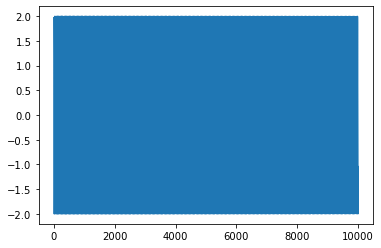

In [13]:
plt.plot(positions[:, 0])

(0.0, 1000.0)

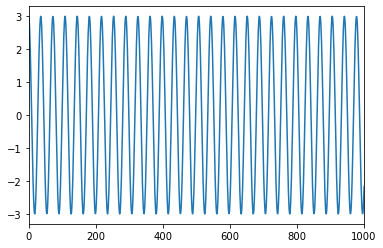

In [14]:
plt.plot(positions[:, 1])
plt.xlim([0, 1000])

(0.0, 1000.0)

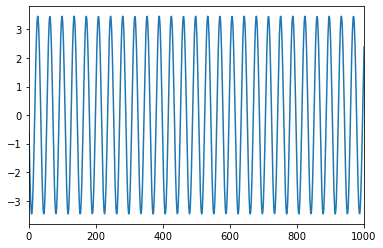

In [15]:
plt.plot(velocitys[:, 0])
plt.xlim([0, 1000])

(0.0, 1000.0)

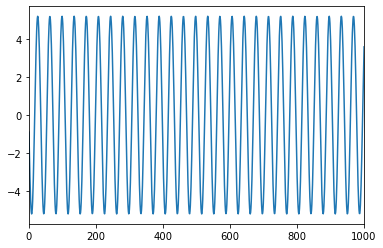

In [16]:
plt.plot(velocitys[:, 1])
plt.xlim([0, 1000])

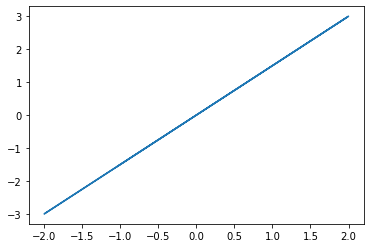

In [17]:
plt.plot(positions[:, 0], positions[:, 1])

Text(0, 0.5, 'momentum p')

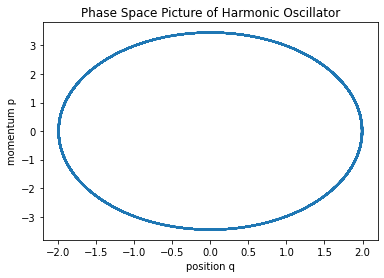

In [18]:
plt.plot(positions[:, 0], velocitys[:, 0])
plt.title("Phase Space Picture of Harmonic Oscillator")
plt.xlabel("position q")
plt.ylabel("momentum p")

Text(0, 0.5, 'momentum p')

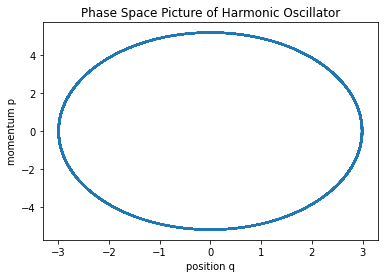

In [19]:
plt.plot(positions[:, 1], velocitys[:, 1])
plt.title("Phase Space Picture of Harmonic Oscillator")
plt.xlabel("position q")
plt.ylabel("momentum p")

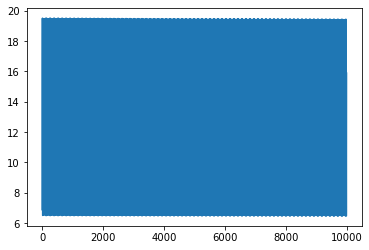

In [20]:
plt.plot(ENERGY)

In [21]:
print(np.average(ENERGY))

12.974565837402436


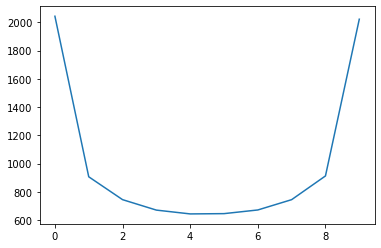

In [22]:
ENERGY_HISTORGRAM, BIN_EDGES = np.histogram(ENERGY)
plt.plot(ENERGY_HISTORGRAM)

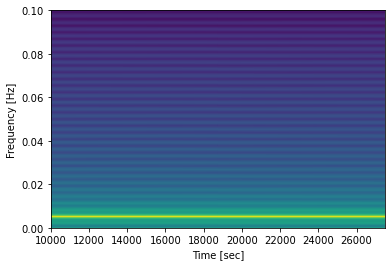

In [23]:
fs = 2 * dt
f1, t1, Sxx = signal.spectrogram(positions[:, 0], fs=fs, nfft = 4000, nperseg = 4000)
plt.pcolormesh(t1, f1, 10 * np.log(Sxx)/np.log(10), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [24]:
df = f1[1] - f1[0]

(0.0, 0.01)

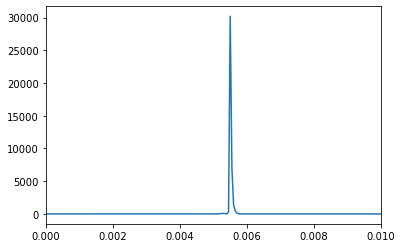

In [25]:
psd = np.mean(Sxx, axis=1)
plt.plot(f1, psd)
plt.xlim([0, 2*0.005])

In [26]:
f1[np.argmax(psd)]/2*np.pi

0.008639379797371931

In [27]:
def quadArea(p1, p2, p3, p4):
    s1 = p2 - p1
    s2 = p3 - p1
    
    s3 = p3 - p4
    s4 = p4 - p1
    
    return np.abs(np.cross(s1, s2))/2 + np.abs(np.cross(s2, s4))/2

In [28]:
a = []
for i in range(len(velocitys[:, 1])):
    a.append(quadArea(positions[i, 0], positions[i, 1], velocitys[i, 0], velocitys[i, 1]))
plt.plot(a)
plt.title("Phase Space Picture of Harmonic Oscillator")
plt.xlabel("position q")
plt.ylabel("momentum p")

AxisError: axisa: axis -1 is out of bounds for array of dimension 0

In [ ]:
#PLANAR OSCILLATORS (in 2d central conservative forces)

In [ ]:
#liouville theorem

In [ ]:
def quadArea(p1, p2, p3, p4):
    s1 = p2 - p1
    s2 = p3 - p1
    
    s3 = p3 - p4
    s4 = p4 - p1
    
    return np.abs(np.cross(s1, s2))/2 + np.abs(np.cross(s2, s4))/2

In [ ]:
def runSIM(initalPos, initalVel, damping, time_step, max_steps):
    #harmonic oscillator in 2d
    _N_TIME_STEPS = max_steps
    _TIME_STEP = time_step

    _INITAL_POSITION = initalPos
    _INITAL_VELOCITY = initalVel
    mass = 1
    time = 0

    dt = _TIME_STEP
    t_end = _N_TIME_STEPS * _TIME_STEP

    position = np.zeros(2)
    velocity = np.zeros(2)
    forces = np.zeros(2)
    
    #harmonic oscillator in 2d
    position = _INITAL_POSITION
    velocity = _INITAL_VELOCITY
    
    positions = np.zeros((_N_TIME_STEPS, 2))
    velocitys = np.zeros((_N_TIME_STEPS, 2))
    ENERGY = np.zeros(_N_TIME_STEPS)
    
    step = 0
    while time < t_end:
        time, velocity, position = RungeKuttaCoupled1(time, velocity, position, dt, dvdt1, dxdt1)
        positions[step, :] = position
        velocitys[step, :] = velocity
        ENERGY[step] = (0.5) * (position[0]**2 + position[1]**2 + velocity[0]**2 + velocity[1]**2)
        step += 1
    
    return positions, velocitys, ENERGY

In [ ]:
p1, q1, e1 = runSIM(np.array([2, 3]), np.array([0, 1]), 0, 0.01, int(1e4))
p2, q2, e2 = runSIM(np.array([1, 1]), np.array([2, -5]), 0, 0.01, int(1e4))
p3, q3, e3 = runSIM(np.array([6, 0]), np.array([-1, 1]), 0, 0.01, int(1e4))
p4, q4, e4 = runSIM(np.array([0, 0]), np.array([2, 0]), 0, 0.01, int(1e4))

In [ ]:
plt.plot(q1[:, 0])

In [ ]:
#get the area
areas = np.zeros(int(1e4))
for i in range(int(1e4)):
    areas[i] = quadArea(
             np.array([p1[i, 0], q1[i, 0]]), 
             np.array([p2[i, 0], q2[i, 0]]), 
             np.array([p3[i, 0], q3[i, 0]]),
             np.array([p4[i, 0], q4[i, 0]])
            )

In [ ]:
plt.plot(areas)
plt.show()

In [ ]:
np.average(areas)

In [ ]:
#autocorrelation

In [ ]:
plt.plot(np.correlate(p1[:, 0], p1[:, 0], "same"))

In [ ]:
plt.plot(np.correlate(p1[:, 1], p1[:, 1], "same"))

In [ ]:
#angular momentum 
# L = rxp
L = np.zeros((len(positions[:, 0]), 2))
for i in range(len(positions[:, 0])):
    L[i, :] = np.cross(positions[i, :], velocitys[i, :])

In [ ]:
L_ABS = np.zeros(len(positions[:, 0]))

for i in range(len(positions[:, 0])):
    L_ABS[i] = np.linalg.norm(L[i, :])

In [ ]:
plt.plot(L_ABS)

In [ ]:
#fluctuation dissipaiton
#nonlinear effects
#other dynamics etc.
#kepler problem etc.

#interacting oscillators
#Hamiltonian dynamics

In [ ]:
# billiard : triangle 
# 
#
#

In [ ]:
#
#
#

In [ ]:
#
#
#

In [ ]:
#
#
#

In [ ]:
#
#
#

In [ ]:
#
#
#